In [42]:
import csv
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('v_ma_formatted.csv')

In [44]:
df.head()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
0,91233,20080319,MA,208.39000,-0.017066,0.000000
1,91233,20080320,MA,220.38000,0.014587,0.057536
2,91233,20080324,MA,216.50000,0.021720,-0.017606
3,91233,20080325,MA,224.98000,0.010894,0.039169
4,91233,20080326,MA,222.85001,-0.002748,-0.009467


In [45]:
df_ma = df[:2214]
df_visa = df[2214:]

In [46]:
df_ma.tail()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
2209,91233,20161223,MA,104.71,0.004891,0.003835
2210,91233,20161227,MA,104.80,0.003181,0.000860
2211,91233,20161228,MA,103.68,-0.007221,-0.010687
2212,91233,20161229,MA,103.77,0.001362,0.000868
2213,91233,20161230,MA,103.25,-0.001826,-0.005011


In [47]:
df_visa.head()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
2214,92611,20080319,V,56.50,-0.017066,0.000000
2215,92611,20080320,V,64.35,0.014587,0.138938
2216,92611,20080324,V,59.73,0.021720,-0.071795
2217,92611,20080325,V,63.25,0.010894,0.058932
2218,92611,20080326,V,63.96,-0.002748,0.011225


In [48]:
df_ma_returns = df_ma["RETURNS"].tolist()

In [49]:
df_ma_date = df_ma["date"].tolist()
df_ma_date = pd.to_datetime([str(i) for i in df_ma_date], format='%Y%m%d')

In [50]:
df_visa_returns = df_visa["RETURNS"].tolist()

In [51]:
df_visa_date = df_visa["date"].tolist()
df_visa_date = pd.to_datetime([str(i) for i in df_visa_date], format='%Y%m%d')

In [106]:
dataframe = [('Date', df_visa_date), 
            ('Visa', df_visa_returns), 
            ('Master', df_ma_returns)]
new_df = pd.DataFrame.from_items(dataframe)
new_df.head()

new_df.to_csv('~/Desktop/KSEAProject/new_df')

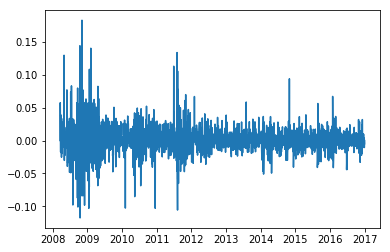

In [53]:
plt.plot(df_ma_date, df_ma_returns)
plt.show()

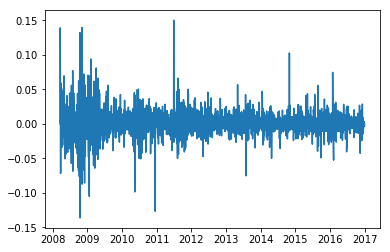

In [54]:
plt.plot(df_visa_date, df_visa_returns)
plt.show()

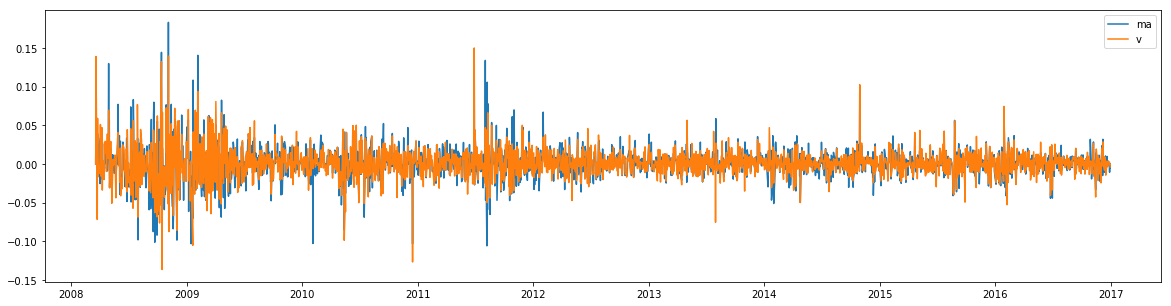

In [55]:
fig = plt.figure(figsize=(20, 5))
graph = fig.add_subplot(111)
graph.plot(df_ma_date, df_ma_returns ,label='ma')
graph.plot(df_visa_date, df_visa_returns, label='v')
plt.legend()
plt.show()

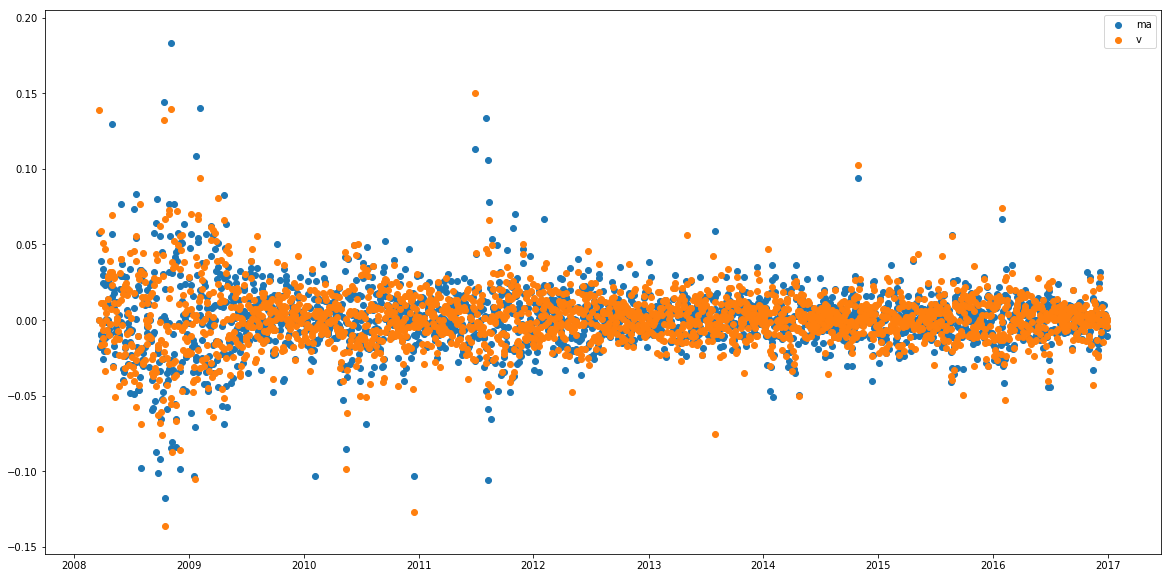

In [57]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
graph.scatter(df_ma_date, df_ma_returns ,label='ma')
graph.scatter(df_visa_date, df_visa_returns, label='v')
plt.legend()
plt.show()

In [59]:
from statsmodels.tsa.stattools import adfuller

In [61]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print (adf)
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

In [63]:
ADF(df_visa_returns)

(-28.106610735246406, 0.0, 2, 2211, {'1%': -2.5667519585862473, '5%': -1.9411221689501459, '10%': -1.6167004261919438}, -11068.684267559987)


False

In [77]:
ADF(df_ma_returns)

(-36.252579123960103, 0.0, 1, 2212, {'1%': -2.5667515007651835, '5%': -1.941122113411623, '10%': -1.6167004800000682}, -10698.427137551043)


False

In [87]:
def cadf(y, x):
    result = OLS(y, x).fit()
    return ADF(result.resid)

In [88]:
cadf(df_visa_returns, df_ma_returns)

(-20.629539970133404, 0.0, 6, 2207, {'1%': -2.5667537940223561, '5%': -1.9411223916103213, '10%': -1.6167002104740829}, -13239.250163011733)


False

In [82]:
from statsmodels.regression.linear_model import OLS

In [89]:
class Holder(object):
    pass

def rows(x):
    return x.shape[0]

def trimr(x, front, end):
    if end > 0:
        return x[front:-end]
    else:
        return x[front:]

import statsmodels.tsa.tsatools as tsat
mlag = tsat.lagmat

def mlag_(x, maxlag):
    '''return all lags up to maxlag
    '''
    return x[:-lag]

def lag(x, lag):
    return x[:-lag]

def detrend(y, order):
    if order == -1:
        return y
    return OLS(y, np.vander(np.linspace(-1, 1, len(y)), order + 1)).fit().resid

def resid(y, x):
    r = y - np.dot(x, np.dot(np.linalg.pinv(x), y))
    return r




def coint_johansen(x, p, k, print_on_console=True):

    #    % error checking on inputs
    #    if (nargin ~= 3)
    #     error('Wrong # of inputs to johansen')
    #    end
    nobs, m = x.shape

    # why this?  f is detrend transformed series, p is detrend data
    if (p > -1):
        f = 0
    else:
        f = p

    x = detrend(x, p)
    dx = tdiff(x, 1, axis=0)
    # dx    = trimr(dx,1,0)
    z = mlag(dx, k)  # [k-1:]
#    print z.shape
    z = trimr(z, k, 0)
    z = detrend(z, f)
#    print dx.shape
    dx = trimr(dx, k, 0)

    dx = detrend(dx, f)
    # r0t   = dx - z*(z\dx)
    r0t = resid(dx, z)  # diff on lagged diffs
    # lx = trimr(lag(x,k),k,0)
    lx = lag(x, k)
    lx = trimr(lx, 1, 0)
    dx = detrend(lx, f)
#    print 'rkt', dx.shape, z.shape
    # rkt   = dx - z*(z\dx)
    rkt = resid(dx, z)  # level on lagged diffs
    skk = np.dot(rkt.T, rkt) / rows(rkt)
    sk0 = np.dot(rkt.T, r0t) / rows(rkt)
    s00 = np.dot(r0t.T, r0t) / rows(r0t)
    sig = np.dot(sk0, np.dot(inv(s00), (sk0.T)))
    tmp = inv(skk)
    # du, au = eig(np.dot(tmp, sig))
    au, du = eig(np.dot(tmp, sig))  # au is eval, du is evec
    # orig = np.dot(tmp, sig)

    # % Normalize the eigen vectors such that (du'skk*du) = I
    temp = inv(chol(np.dot(du.T, np.dot(skk, du))))
    dt = np.dot(du, temp)


    # JP: the next part can be done much  easier

    # %      NOTE: At this point, the eigenvectors are aligned by column. To
    # %            physically move the column elements using the MATLAB sort,
    # %            take the transpose to put the eigenvectors across the row

    # dt = transpose(dt)

    # % sort eigenvalues and vectors

    # au, auind = np.sort(diag(au))
    auind = np.argsort(au)
    # a = flipud(au)
    aind = flipud(auind)
    a = au[aind]
    # d = dt[aind,:]
    d = dt[:, aind]

    # %NOTE: The eigenvectors have been sorted by row based on auind and moved to array "d".
    # %      Put the eigenvectors back in column format after the sort by taking the
    # %      transpose of "d". Since the eigenvectors have been physically moved, there is
    # %      no need for aind at all. To preserve existing programming, aind is reset back to
    # %      1, 2, 3, ....

    # d  =  transpose(d)
    # test = np.dot(transpose(d), np.dot(skk, d))

    # %EXPLANATION:  The MATLAB sort function sorts from low to high. The flip realigns
    # %auind to go from the largest to the smallest eigenvalue (now aind). The original procedure
    # %physically moved the rows of dt (to d) based on the alignment in aind and then used
    # %aind as a column index to address the eigenvectors from high to low. This is a double
    # %sort. If you wanted to extract the eigenvector corresponding to the largest eigenvalue by,
    # %using aind as a reference, you would get the correct eigenvector, but with sorted
    # %coefficients and, therefore, any follow-on calculation would seem to be in error.
    # %If alternative programming methods are used to evaluate the eigenvalues, e.g. Frame method
    # %followed by a root extraction on the characteristic equation, then the roots can be
    # %quickly sorted. One by one, the corresponding eigenvectors can be generated. The resultant
    # %array can be operated on using the Cholesky transformation, which enables a unit
    # %diagonalization of skk. But nowhere along the way are the coefficients within the
    # %eigenvector array ever changed. The final value of the "beta" array using either method
    # %should be the same.


    # % Compute the trace and max eigenvalue statistics */
    lr1 = zeros(m)
    lr2 = zeros(m)
    cvm = zeros((m, 3))
    cvt = zeros((m, 3))
    iota = ones(m)
    t, junk = rkt.shape
    for i in range(0, m):
        tmp = trimr(log(iota - a), i , 0)
        lr1[i] = -t * np.sum(tmp, 0)  # columnsum ?
        # tmp = np.log(1-a)
        # lr1[i] = -t * np.sum(tmp[i:])
        lr2[i] = -t * log(1 - a[i])
        cvm[i, :] = c_sja(m - i, p)
        cvt[i, :] = c_sjt(m - i, p)
        aind[i] = i
    # end

    result = Holder()
    # % set up results structure
    # estimation results, residuals
    result.rkt = rkt
    result.r0t = r0t
    result.eig = a
    result.evec = d  # transposed compared to matlab ?
    result.lr1 = lr1
    result.lr2 = lr2
    result.cvt = cvt
    result.cvm = cvm
    result.ind = aind
    result.meth = 'johansen'

    if print_on_console == True:
        print ('--------------------------------------------------')
        print ('--> Trace Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr1)):
            print ('r =', i, '\t', round(result.lr1[i], 4), result.cvt[i, 0], result.cvt[i, 1], result.cvt[i, 2])
        print ('--------------------------------------------------')
        print ('--> Eigen Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr2)):
            print ('r =', i, '\t', round(result.lr2[i], 4), result.cvm[i, 0], result.cvm[i, 1], result.cvm[i, 2])
        print ('--------------------------------------------------')
        print ('eigenvectors:\n', result.evec)
        print ('--------------------------------------------------')
        print ('eigenvalues:\n', result.eig)
        print ('--------------------------------------------------')


    return result

In [90]:
import scipy

In [94]:
import numpy as np
from statsmodels.tsa.tsatools import lagmat

import critical_values


class Johansen(object):
    """Implementation of the Johansen test for cointegration.

    References:
        - Hamilton, J. D. (1994) 'Time Series Analysis', Princeton Univ. Press.
        - MacKinnon, Haug, Michelis (1996) 'Numerical distribution functions of
        likelihood ratio tests for cointegration', Queen's University Institute
        for Economic Research Discussion paper.

    """

    def __init__(self, x, model, k=1, trace=True,  significance_level=1):
        """
        :param x: (nobs, m) array of time series. nobs is the number of
        observations, or time stamps, and m is the number of series.

        :param k: The number of lags to use when regressing on the first
        difference of x.

        :param trace: Whether to use the trace statistic or the max eigenvalue
        statistic. If set to False, the latter is used.

        :param trace: Whether to use the trace or max eigenvalue statistic for
        the hypothesis testing. If False the max eigenvalue statistic will be
        used.

        :param model: Which of the five cases in Osterwald-Lenum 1992 (or
        MacKinnon 1996) to use.
            - If set to 0, case 0 will be used. This case should be used if
            the input time series have no deterministic terms and all the
            cointegrating relations are expected to have 0 mean.
            - If set to 1, case 1* will be used. This case should be used if
            the input time series has neither a quadratic nor linear trend,
            but may have a constant term, and additionally if the cointegrating
            relations may have nonzero means.
            - If set to 2, case 1 will be used. This case should be used if
            the input time series have linear trends but the cointegrating
            relations are not expected to have linear trends.
            - If set to 3, case 2* will be used. This case should be used if
            the input time series do not have quadratic trends, but they and
            the cointegrating relations may have linear trends.
            - If set to 4, case 2 will be used. This case should be used if
            the input time series have quadratic trends, but the cointegrating
            relations are expected to only have linear trends.

        :param significance_level: Which significance level to use. If set to
        0, 90% significance will be used. If set to 1, 95% will be used. If set
        to 2, 99% will be used.

        """

        self.x = x
        self.k = k
        self.trace = trace
        self.model = model
        self.significance_level = significance_level

        if trace == True:
            key = "TRACE_{}".format(model)
        else:
            key = "MAX_EVAL_{}".format(model)

        critical_values_str = critical_values.mapping[key]

        select_critical_values = np.array(
            critical_values_str.split(),
            float).reshape(-1, 3)

        self.critical_values = select_critical_values[:, significance_level]

    def mle(self):
        """Obtain the cointegrating vectors and corresponding eigenvalues.

        Maximum likelihood estimation and reduced rank regression are used to
        obtain the cointegrating vectors and corresponding eigenvalues, as
        outlined in Hamilton 1995.

        """

        # Regressions on diffs and levels of x. Get regression residuals.

        # First differences of x.
        x_diff = np.diff(self.x, axis=0)

        # Lags of x_diff.
        x_diff_lags = lagmat(x_diff, self.k, trim='both')

        # First lag of x.
        x_lag = lagmat(self.x, 1, trim='both')

        # Trim x_diff and x_lag so they line up with x_diff_lags.
        x_diff = x_diff[self.k:]
        x_lag = x_lag[self.k:]

        # Include intercept in the regressions if self.model != 0.
        if self.model != 0:
            ones = np.ones((x_diff_lags.shape[0], 1))
            x_diff_lags = np.append(x_diff_lags, ones, axis=1)

        # Include time trend in the regression if self.model = 3 or 4.
        if self.model in (3, 4):
            times = np.asarray(range(x_diff_lags.shape[0])).reshape((-1, 1))
            x_diff_lags = np.append(x_diff_lags, times, axis=1)

        # Residuals of the regressions of x_diff and x_lag on x_diff_lags.
        try:
            inverse = np.linalg.pinv(x_diff_lags)
        except:
            print ("Unable to take inverse of x_diff_lags.")
            return None

        u = x_diff - np.dot(x_diff_lags, np.dot(inverse, x_diff))
        v = x_lag - np.dot(x_diff_lags, np.dot(inverse, x_lag))

        # Covariance matrices of the residuals.
        t = x_diff_lags.shape[0]
        Svv = np.dot(v.T, v) / t
        Suu = np.dot(u.T, u) / t
        Suv = np.dot(u.T, v) / t
        Svu = Suv.T

        try:
            Svv_inv = np.linalg.inv(Svv)
        except:
            print ("Unable to take inverse of Svv.")
            return None
        try:
            Suu_inv = np.linalg.inv(Suu)
        except:
            print ("Unable to take inverse of Suu.")
            return None

        # Eigenvalues and eigenvectors of the product of covariances.
        cov_prod = np.dot(Svv_inv, np.dot(Svu, np.dot(Suu_inv, Suv)))
        eigenvalues, eigenvectors = np.linalg.eig(cov_prod)

        # Normalize the eigenvectors using Cholesky decomposition.
        evec_Svv_evec =  np.dot(eigenvectors.T, np.dot(Svv, eigenvectors))
        cholesky_factor = np.linalg.cholesky(evec_Svv_evec)
        try:
            eigenvectors = np.dot(eigenvectors,
                                  np.linalg.inv(cholesky_factor.T))
        except:
            print ("Unable to take the inverse of the Cholesky factor.")
            return None

        # Ordering the eigenvalues and eigenvectors from largest to smallest.
        indices_ordered = np.argsort(eigenvalues)
        indices_ordered = np.flipud(indices_ordered)
        eigenvalues = eigenvalues[indices_ordered]
        eigenvectors = eigenvectors[:, indices_ordered]

        return eigenvectors, eigenvalues

    def h_test(self, eigenvalues, r):
        """Carry out hypothesis test.

        The null hypothesis is that there are at most r cointegrating vectors.
        The alternative hypothesis is that there are at most m cointegrating
        vectors, where m is the number of input time series.

        :param eigenvalues: The list of eigenvalues returned from the mle
        function.

        :param r: The number of cointegrating vectors to use in the null
        hypothesis.

        :return: True if the null hypothesis is rejected, False otherwise.

        """

        nobs, m = self.x.shape
        t = nobs - self.k - 1

        if self.trace == True:
            m = len(eigenvalues)
            statistic = -t * np.sum(np.log(np.ones(m) - eigenvalues)[r:])
        else:
            statistic = -t * np.sum(np.log(1 - eigenvalues[r]))

        critical_value = self.critical_values[m - r -1]

        if statistic > critical_value:
            return True
        else:
            return False

    def johansen(self):
        """Obtain the possible cointegrating relations and numbers of them.

        See the documentation for methods mle and h_test.

        :return: The possible cointegrating relations, i.e. the eigenvectors
        obtained from maximum likelihood estimation, and the numbers of
        cointegrating relations for which the null hypothesis is rejected.

        """

        nobs, m = self.x.shape

        try:
            eigenvectors, eigenvalues = self.mle()
        except:
            print ("Unable to obtain possible cointegrating relations.")
            return None

        rejected_r_values = []
        for r in range(m):
            if self.h_test(eigenvalues, r):
                rejected_r_values.append(r)

        return eigenvectors, rejected_r_values


In [98]:
Johansen(df_ma_returns + df_visa_returns, 0).johansen

<bound method Johansen.johansen of <__main__.Johansen object at 0x11c44bb38>>

In [99]:
print(Johansen(df_ma_returns + df_visa_returns, 0).johansen)

<bound method Johansen.johansen of <__main__.Johansen object at 0x11c44b278>>
